## Observations and Insights 

In [47]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"


In [6]:
# Read the mouse data and the study results

In [9]:
mouse_metadata = pd.read_csv(mouse_metadata_path)
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [10]:
study_results = pd.read_csv(study_results_path)
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [11]:
# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")


In [12]:
# Display the data table for preview
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [13]:
# Checking the number of mice.
merge_df["Mouse ID"].nunique()

249

In [15]:
merge_df.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

In [64]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mice_df = merge_df[["Mouse ID", "Timepoint"]]
duplicate_mice_df = mice_df.loc[mice_df.duplicated(subset=["Mouse ID","Timepoint"]),"Mouse ID"].unique()
print(duplicate_mice_df)

['g989']


In [65]:
duplicate_data = merge_df.loc[merge_df["Mouse ID"]=="g989"]
duplicate_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [26]:
# Optional: Get all the data for the duplicate mouse ID. 
mice_df = merge_df
duplicate_mice_df = mice_df[mice_df.duplicated(["Mouse ID"])]
duplicate_mice_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [30]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_duplicate_mice_df = duplicate_mice_df.loc[(
    duplicate_mice_df["Timepoint"] > 0)]
clean_duplicate_mice_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1


In [67]:
clean_test = merge_df[merge_df["Mouse ID"].isin(duplicate_mice_df)==False]
clean_test

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [70]:
# Checking the number of mice in the clean DataFrame.
clean_test["Mouse ID"].nunique()

248

## Summary Statistics

In [71]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
renamed_tumor_df = clean_test.rename(columns={"Tumor Volume (mm3)":"Tumor Volume mm3"})
renamed_tumor_df["Tumor Volume mm3"].describe()

# How calculate SEM??


count    1880.000000
mean       50.435293
std         8.914197
min        22.050126
25%        45.000000
50%        48.933454
75%        56.324075
max        78.567014
Name: Tumor Volume mm3, dtype: float64

In [73]:
sem_value = clean_test.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]
sem_value
mean_value = clean_test.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
mean_value
median_value = clean_test.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
median_value
std_value = clean_test.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
std_value
var_value = clean_test.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
var_value



Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [74]:
summary_tumor = pd.DataFrame({"mean":mean_value,"median":median_value,"std":std_value,"var":var_value,"sem":sem_value})
summary_tumor

,mean,median,std,var,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,54.331565,52.509285,8.134708,66.173479,0.596466
Placebo,54.033581,52.288934,7.821003,61.168083,0.581331
Propriva,52.320930,50.446266,6.622085,43.852013,0.544332
Ramicane,40.216745,40.673236,4.846308,23.486704,0.320955
Stelasyn,54.233149,52.431737,7.710419,59.450562,0.573111


In [46]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
group_drug_regimen = renamed_tumor_df.groupby(["Drug Regimen"])
# mean, median, variance, standard deviation, and SEM of the tumor volume.
group_drug_regimen["Tumor Volume mm3"].describe()
# Assemble the resulting series into a single summary dataframe.
#???

,count,mean,std,min,25%,50%,75%,max
Drug Regimen,,,,,,,,
Capomulin,205.0,40.148392,5.043219,23.343598,36.843898,40.716428,44.160519,48.158209
Ceftamin,153.0,53.831559,5.892856,45.546076,48.722078,52.847559,58.077583,68.923185
Infubinol,153.0,54.173160,6.190806,36.321346,49.431685,53.244458,58.268442,72.226731
Ketapril,163.0,56.805521,7.777219,45.694188,50.154711,56.098998,62.142332,78.567014
Naftisol,161.0,55.780565,7.797077,45.656978,49.040225,54.234502,61.190387,76.668817
Placebo,156.0,55.481270,7.467422,45.691124,48.917293,53.354528,60.537900,73.212939
Propriva,135.0,53.732821,6.177451,45.544700,48.843177,52.682695,56.887190,72.455421
Ramicane,203.0,39.627674,4.818000,22.050126,36.236711,39.769552,43.578020,47.622816
Stelasyn,157.0,55.644586,7.312751,45.751727,49.412624,54.328317,60.605440,75.123690


In [76]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_agg = clean_test.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","std","var","sem"]})
summary_agg

Tumor Volume (mm3)                                          
                           mean     median       std        var       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  4.994774  24.947764  0.329346
Ceftamin              52.591172  51.776157  6.268188  39.290177  0.469821
Infubinol             52.884795  51.820584  6.567243  43.128684  0.492236
Ketapril              55.235638  53.698743  8.279709  68.553577  0.603860
Naftisol              54.331565  52.509285  8.134708  66.173479  0.596466
Placebo               54.033581  52.288934  7.821003  61.168083  0.581331
Propriva              52.320930  50.446266  6.622085  43.852013  0.544332
Ramicane              40.216745  40.673236  4.846308  23.486704  0.320955
Stelasyn              54.233149  52.431737  7.710419  59.450562  0.573111
Zoniferol             53.236507  51.818479  6.966589  48.533355  0.516398

## Bar and Pie Charts

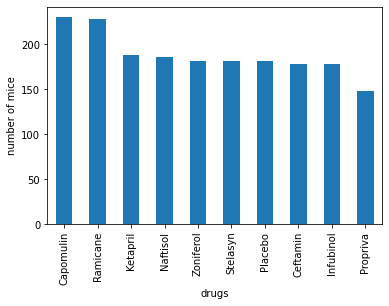

In [79]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
totals = clean_test["Drug Regimen"].value_counts()
totals
totals.plot(kind="bar")
plt.xlabel("drugs")
plt.xticks(rotation=90)
plt.ylabel("number of mice")
plt.show()

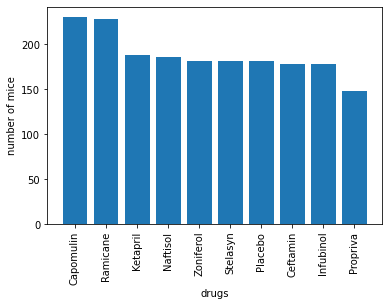

In [81]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
plt.bar(totals.index.values,totals.values)
plt.xlabel("drugs")
plt.xticks(rotation=90)
plt.ylabel("number of mice")
plt.show()

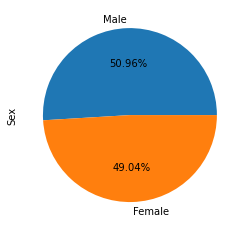

In [85]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_totals = clean_test["Sex"].value_counts()
gender_totals.plot(kind="pie",autopct="%1.2f%%")
plt.show()


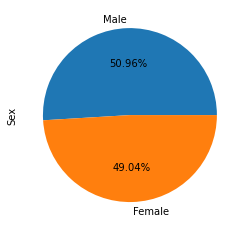

In [87]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_totals.values,labels=gender_totals.index.values,autopct="%1.2f%%")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
